## Observations and Insights 

Three observations:
1. The gender amonst mice (including time periods) is close to equal.
2. Infubinol had the only mouse with a quartile outlier.  While this doesn't necessarily indicate that Infubinol should be ruled out as a viable drug regmin for the study, it would infer that further investigation into that mouse would be helpful.
3. Capomulin has worked well for a single sample mouse.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# check for any duplicate mouse/timepoint combinations
study_results_dups = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
study_results_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [3]:
# Create a new df to remove the duplicates. Use this dataframe in remainng steps
study_results_unique = pd.DataFrame(study_results)
study_results_unique = study_results_unique.drop_duplicates(subset=['Mouse ID','Timepoint'])
# show number of results for future reference
num_study_results = study_results_unique['Mouse ID'].count()
num_study_results

1888

In [4]:
# Combine the data into a single dataset.  This will be the main source dataframe used in further analysis.
study_data_ugly = pd.merge(mouse_metadata, study_results_unique, how = "inner", on =["Mouse ID"])
study_data = pd.DataFrame(study_data_ugly)
# Change tumor volume to a number
study_data['Tumor Volume (mm3)'] = study_data['Tumor Volume (mm3)'].astype(float)

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice and rows in the clean DataFrame
mouse_count = study_data["Mouse ID"].nunique()
mouse_count
print(f"The number of total data points is {num_study_results} and the number of mice is {mouse_count}.")

The number of total data points is 1888 and the number of mice is 249.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mice_mean = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
mice_median = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
mice_variance = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
mice_std = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
mice_sem = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

## Note to myself when reviewing in the future: there are 2 ways to calc these stats:
## mice_variance = np.var(study_data, ddof = 0)
## mice_std = np.std(study_data, ddof = 0)
## mice_test = np.var(study_data, ddof = 0)

mice_summary_df = pd.DataFrame({"Average": mice_mean, "Median": mice_median, "Variance": mice_variance, "Standard Deviation": mice_std, "SEM": mice_sem})
mice_summary_df

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line
mice_agg = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
mice_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

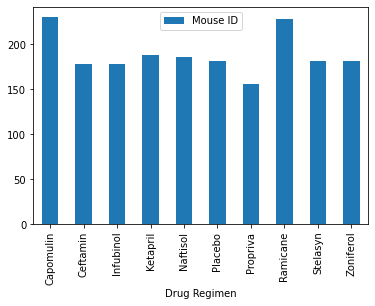

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg = pd.DataFrame(study_data.groupby('Drug Regimen')["Mouse ID"].count())
drug_plot_pandas = drug_reg.plot.bar()

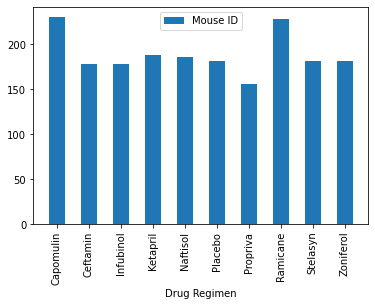

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = drug_reg.index.tolist()
y_data = drug_reg["Mouse ID"].tolist()

plt.bar(x_axis, y_data, width = .5)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.legend(['Mouse ID'])

plt.show()

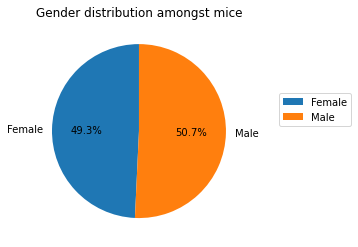

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist = pd.DataFrame(study_data.groupby('Sex')["Mouse ID"].count())

sex_pie_pandas = sex_dist.plot.pie(y ='Mouse ID',autopct="%1.1f%%", startangle=90)
plt.legend(loc='lower right', bbox_to_anchor=(1.5,0.5))
plt.axis('off')
plt.title("Gender distribution amongst mice")
plt.show()

## note to myself in the future - how to remove the male/female lables and keep the legend? All attempts were not working.

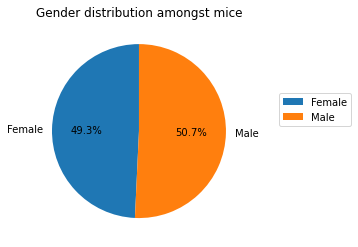

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis_sex = sex_dist.index.tolist()
y_data_sex = sex_dist["Mouse ID"].tolist()

plt.pie(y_data_sex, labels = x_axis_sex,autopct="%1.1f%%",startangle = 90)
plt.axis('off')
plt.legend()
plt.title("Gender distribution amongst mice")
plt.legend(loc='lower right', bbox_to_anchor=(1.5,0.5))
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
## Note to my future self. This method assumes the original data is sorted by timepoint. Lucky me this time.  Next time use max
mice_final_time = pd.DataFrame(study_data.groupby('Mouse ID')["Timepoint"].tail(1))

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_final_tumor = pd.merge(study_data, mice_final_time, left_index = True, right_index = True)

# Limit to Capomulin, Ramicane, Infubinol, and Ceftamin                                                          
mice_final_tumor_limited = mice_final_tumor.loc[(mice_final_tumor["Drug Regimen"] == "Capomulin") |(mice_final_tumor["Drug Regimen"] == "Ramicane") |(mice_final_tumor["Drug Regimen"] == "Infubinol") |(mice_final_tumor["Drug Regimen"] == "Ceftamin")]                                                                        
mice_final_tumor_limited = mice_final_tumor_limited.drop('Timepoint_y',1)
# Take a peek at the data
mice_final_tumor_limited.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [26]:
# Put treatments into a list for a for loop (and later for plot labels)
# Note that mice_final_tumor_limited is a data set that includes only the 4 drug regimens in question.
regimen = mice_final_tumor_limited['Drug Regimen'].unique()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for reg in regimen:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    print(reg)
    mice_reg = mice_final_tumor.loc[mice_final_tumor["Drug Regimen"] == reg]    
    quartiles = mice_reg['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    upperb = round(upperq + (1.5*iqr),2)
    lowerb = round(lowerq - (1.5*iqr),2)
    # add subset 
    tumor_vol.append(mice_reg['Tumor Volume (mm3)'])
    # Determine outliers using upper and lower bounds
    mice_outliers = mice_reg.loc[(mice_reg["Tumor Volume (mm3)"]<lowerb) | (mice_reg["Tumor Volume (mm3)"]>upperb)]
#     print(f"The lower quartile of occupancy is: {lowerq:.2f}")
#     print(f"The upper quartile of occupancy is: {upperq:.2f}")
#     print(f"The interquartile range of occupancy is: {iqr:.2f}")
#     print(f"The the median of occupancy is: {quartiles[0.5]:.2f} ")
#     print(upperb)
#     print(lowerb)

display(mice_outliers)

Ramicane
Capomulin
Infubinol
Ceftamin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y


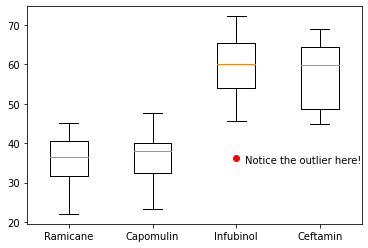

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = regimen, sym = 'r')
# plt.set_ylabel('Final Tumor Volumn')
plt.annotate("Notice the outlier here!",(3.1,35))
plt.show()

## Line and Scatter Plots

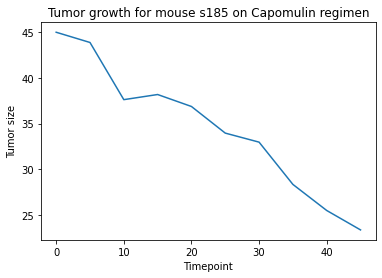

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# line plot for one mouse that was treated with Cap..Find a single mouse, use loc to filter on mouse id.  line plot = plt.plot
# two parameter (x and y)

# Get specific data frame for a mouse
cap_mouse_data = study_data.loc[(study_data["Drug Regimen"] == "Capomulin") & (study_data["Mouse ID"] == 's185')]
xaxis_cap = cap_mouse_data['Timepoint']
yaxis_cap = cap_mouse_data['Tumor Volume (mm3)']
# cap_title_reg = cap_mouse_data['Drug Regimen'].first()
# cap_title_reg
# cap_title_data
mouse_id = cap_mouse_data.groupby('Mouse ID').first().index.get_level_values('Mouse ID')
reg_id = cap_mouse_data.groupby('Drug Regimen').first().index.get_level_values('Drug Regimen')
plt.plot(xaxis_cap, yaxis_cap )
# cap_title = (f"Tumor growth for mouse {Mouse ID} ")
# print(f"Tumor frowth for mouse: {mouse_id}")
plt.title(f"Tumor growth for mouse {mouse_id[0]} on {reg_id[0]} regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor size")
plt.show()

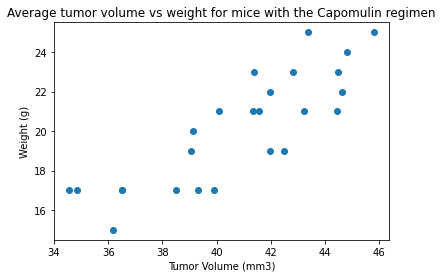

In [16]:
# Generate a scatter plot of average tumor volume vs. average mouse weight for the Capomulin regimen
# filter on Capol...groupby mouseID, then add .mean (on both tumor volume and mouse weight) on groupedby on tumor volumm.

# select data
cap_data = study_data.loc[(study_data["Drug Regimen"] == "Capomulin")]
# set axis
cap_tumvol = cap_data.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
cap_weight = cap_data.groupby('Mouse ID')["Weight (g)"].mean()
# Plot
cap_scatter = plt.scatter(cap_tumvol,cap_weight)
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.title(f"Average tumor volume vs weight for mice with the Capomulin regimen")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correl_coef = st.pearsonr(cap_tumvol, cap_weight)
print(round(correl_coef[0],2))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_tumvol, cap_weight)
regress_values = cap_tumvol * slope + intercept

print((slope, intercept, rvalue, pvalue, stderr))

0.84
(0.7426941826944178, -10.148863164111322, 0.8419363424694718, 1.3225722434712642e-07, 0.09924763572688564)


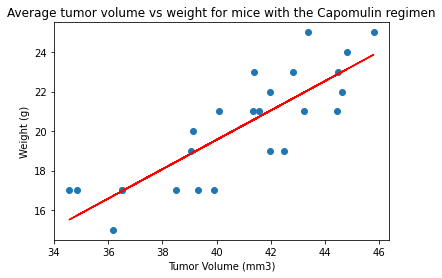

In [18]:
# add linear regression line

cap_scatter = plt.scatter(cap_tumvol,cap_weight)
plt.plot(cap_tumvol,regress_values, "r-")
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume (mm3)')
plt.title(f"Average tumor volume vs weight for mice with the Capomulin regimen")
plt.show()